In [1]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import geopy.distance

In [2]:
airport = pd.read_csv("./data/airport_v3.csv")
airport.loc[:,'Final_Continent'] = airport.Final_Continent.fillna("NA")
print(airport.shape)
airport.head()

(6060, 15)


Airport_ID                                         Name          City  \
0           1                               Goroka Airport        Goroka   
1           2                               Madang Airport        Madang   
2           3                 Mount Hagen Kagamuga Airport   Mount Hagen   
3           4                               Nadzab Airport        Nadzab   
4           5  Port Moresby Jacksons International Airport  Port Moresby   

            Country IATA  ICAO  Latitude   Longitude  Altitude Time_Zone DST  \
0  Papua New Guinea  GKA  AYGA -6.081690  145.391998      5282        10   U   
1  Papua New Guinea  MAG  AYMD -5.207080  145.789001        20        10   U   
2  Papua New Guinea  HGU  AYMH -5.826790  144.296005      5388        10   U   
3  Papua New Guinea  LAE  AYNZ -6.569803  146.725977       239        10   U   
4  Papua New Guinea  POM  AYPY -9.443380  147.220001       146        10   U   

  Tz_Database_time_zone     Type       Source Final_Continent  
0  Pacific/Port_Moresby  airport  OurAirports              OC  
1  Pacific/Port_Moresby  airport  OurAirports              OC  
2  Pacific/Port_Moresby  airport  OurAirports              OC  
3  Pacific/Port_Moresby  airport  OurAirports              OC  
4  Pacific/Port_Moresby  airport  OurAirports              OC

In [3]:
# NA: North America
# AS: Asia
# EU: Europe
# AF: Africa
# SA: South America
# OC: Oceania
airport.Final_Continent.value_counts()

NA    1948
AS    1307
EU    1058
AF     626
SA     572
OC     549
Name: Final_Continent, dtype: int64

In [4]:
route = pd.read_csv("./data/routes.dat",header=None)
route.columns = ["Airline","Airline_ID","Source","Source_ID","Dest","Dest_ID","Code_Share","Stops","Equipment"]
print(route.shape)
route.head()

(67663, 9)


Airline Airline_ID Source Source_ID Dest Dest_ID Code_Share  Stops Equipment
0      2B        410    AER      2965  KZN    2990        NaN      0       CR2
1      2B        410    ASF      2966  KZN    2990        NaN      0       CR2
2      2B        410    ASF      2966  MRV    2962        NaN      0       CR2
3      2B        410    CEK      2968  KZN    2990        NaN      0       CR2
4      2B        410    CEK      2968  OVB    4078        NaN      0       CR2

In [5]:
Route_Mileage = pd.read_csv('./data/Route_Mileage.csv')
Route_Mileage.loc[:,"Source_Continent"] = Route_Mileage.Source_Continent.fillna("NA")
Route_Mileage.loc[:,"Dest_Continent"] = Route_Mileage.Dest_Continent.fillna("NA")
print(Route_Mileage.shape)
Route_Mileage.head()

(33971, 9)


Source Dest  Source_Lat  Source_Lon Source_Continent   Dest_Lat   Dest_Lon  \
0    AER  KZN   43.449902   39.956600               EU  55.606201  49.278702   
1    ASF  KZN   46.283298   48.006302               EU  55.606201  49.278702   
2    ASF  MRV   46.283298   48.006302               EU  44.225101  43.081902   
3    CEK  KZN   55.305801   61.503300               EU  55.606201  49.278702   
4    CEK  OVB   55.305801   61.503300               EU  55.012600  82.650703   

  Dest_Continent     Distance  
0             EU  1507.989680  
1             EU  1040.943207  
2             EU   449.036664  
3             EU   773.126239  
4             EU  1343.161122

In [6]:
NA_Routes = Route_Mileage[(Route_Mileage.Source_Continent=="NA")&(Route_Mileage.Dest_Continent != "NA")]
NA_Routes.groupby('Dest_Continent')['Distance'].min()

Dest_Continent
AF    5452.608696
AS    6090.337244
EU    1405.935942
OC    2139.862991
SA      81.086676
Name: Distance, dtype: float64

In [7]:
NA_MIN = NA_Routes.groupby('Dest_Continent')['Distance'].min().reset_index()
NA_Routes = NA_Routes.merge(NA_MIN,how='inner',on=['Dest_Continent','Distance'])
NA_Routes[["Source","Dest","Source_Continent","Dest_Continent","Distance"]]

Source Dest Source_Continent Dest_Continent     Distance
0    AUA  LSP               NA             SA    81.086676
1    HNL  CXI               NA             OC  2139.862991
2    GOH  KEF               NA             EU  1405.935942
3    HNL  SDJ               NA             AS  6090.337244
4    BOS  RAI               NA             AF  5452.608696

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  after removing the cwd from sys.path.
//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  import sys
//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  


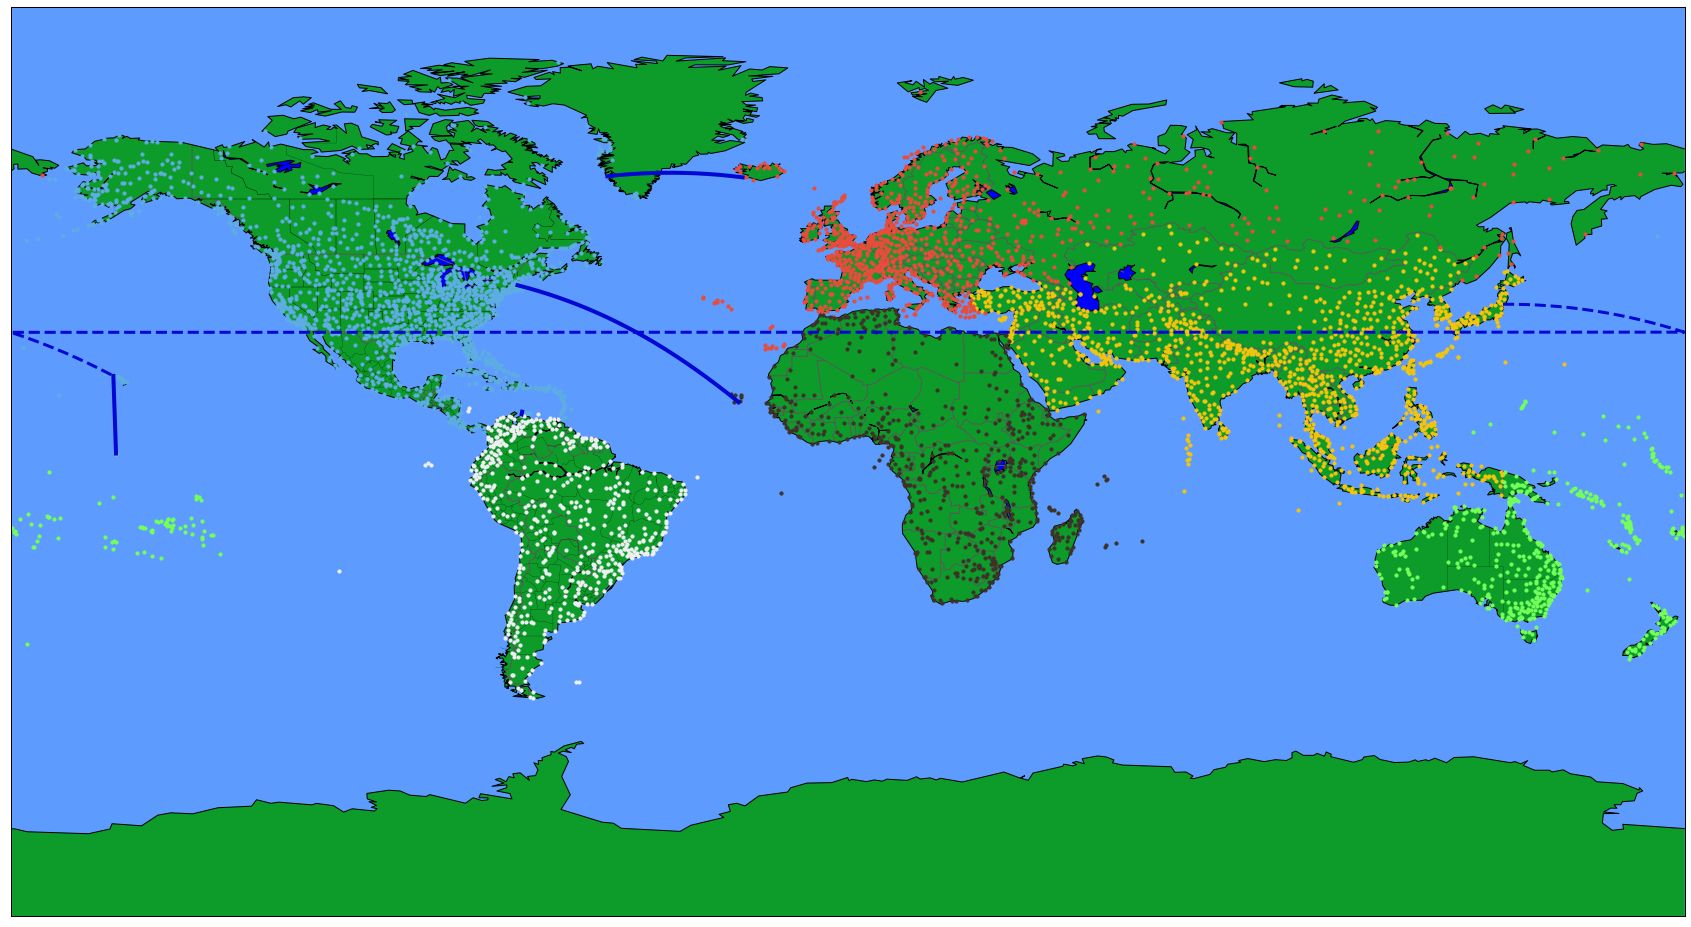

In [8]:
# Plotting the routes on the map
color_set = ["#5DADE2","#F1C40F","#E74C3C","#3D3228","#ECF0F1","#73FF5B"]
plt.figure(figsize = (30,20))
m = Basemap(projection='gall')
m.fillcontinents(color="#0D9C29",lake_color="blue")
m.drawmapboundary(fill_color="#5D9BFF")
m.drawcountries(color='#585858',linewidth = 1)
m.drawstates(linewidth = 0.2)
m.drawcoastlines(linewidth=1)
i = 0
for cont in ["NA","AS","EU","AF","SA","OC"]:
    X, Y = m(list(airport[airport.Final_Continent==cont].Longitude),list(airport[airport.Final_Continent==cont].Latitude))
    m.scatter(X, Y, color=color_set[i],s=10,zorder=2)
    i += 1
for index, row in NA_Routes.iterrows():
    if row['Dest_Continent'] == "AS":
        x, y = m.gcpoints(row['Dest_Lon'],row['Dest_Lat'],row['Source_Lon'],row['Source_Lat'],500)
        m.plot(x,y,color="#0007D3",linewidth=3,linestyle='dashed')
    else:
        x, y = m.gcpoints(row['Source_Lon'],row['Source_Lat'],row['Dest_Lon'],row['Dest_Lat'],500)
        m.plot(x,y,color="#0007D3",linewidth=4)
plt.show()

In [9]:
# South America
SA_Routes = Route_Mileage[(Route_Mileage.Source_Continent=="SA")&(Route_Mileage.Dest_Continent != "SA")]
SA_MIN = SA_Routes.groupby('Dest_Continent')['Distance'].min().reset_index()
SA_Routes = SA_Routes.merge(SA_MIN,how='inner',on=['Dest_Continent','Distance'])
SA_Routes[["Source","Dest","Source_Continent","Dest_Continent","Distance"]]

Source Dest Source_Continent Dest_Continent      Distance
0    LSP  AUA               SA             NA     81.086676
1    IPC  PPT               SA             OC   4254.118466
2    GRU  IST               SA             AS  10546.273142
3    FOR  LIS               SA             EU   5597.603200
4    FOR  RAI               SA             AF   2651.135667

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  after removing the cwd from sys.path.
//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  import sys
//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  


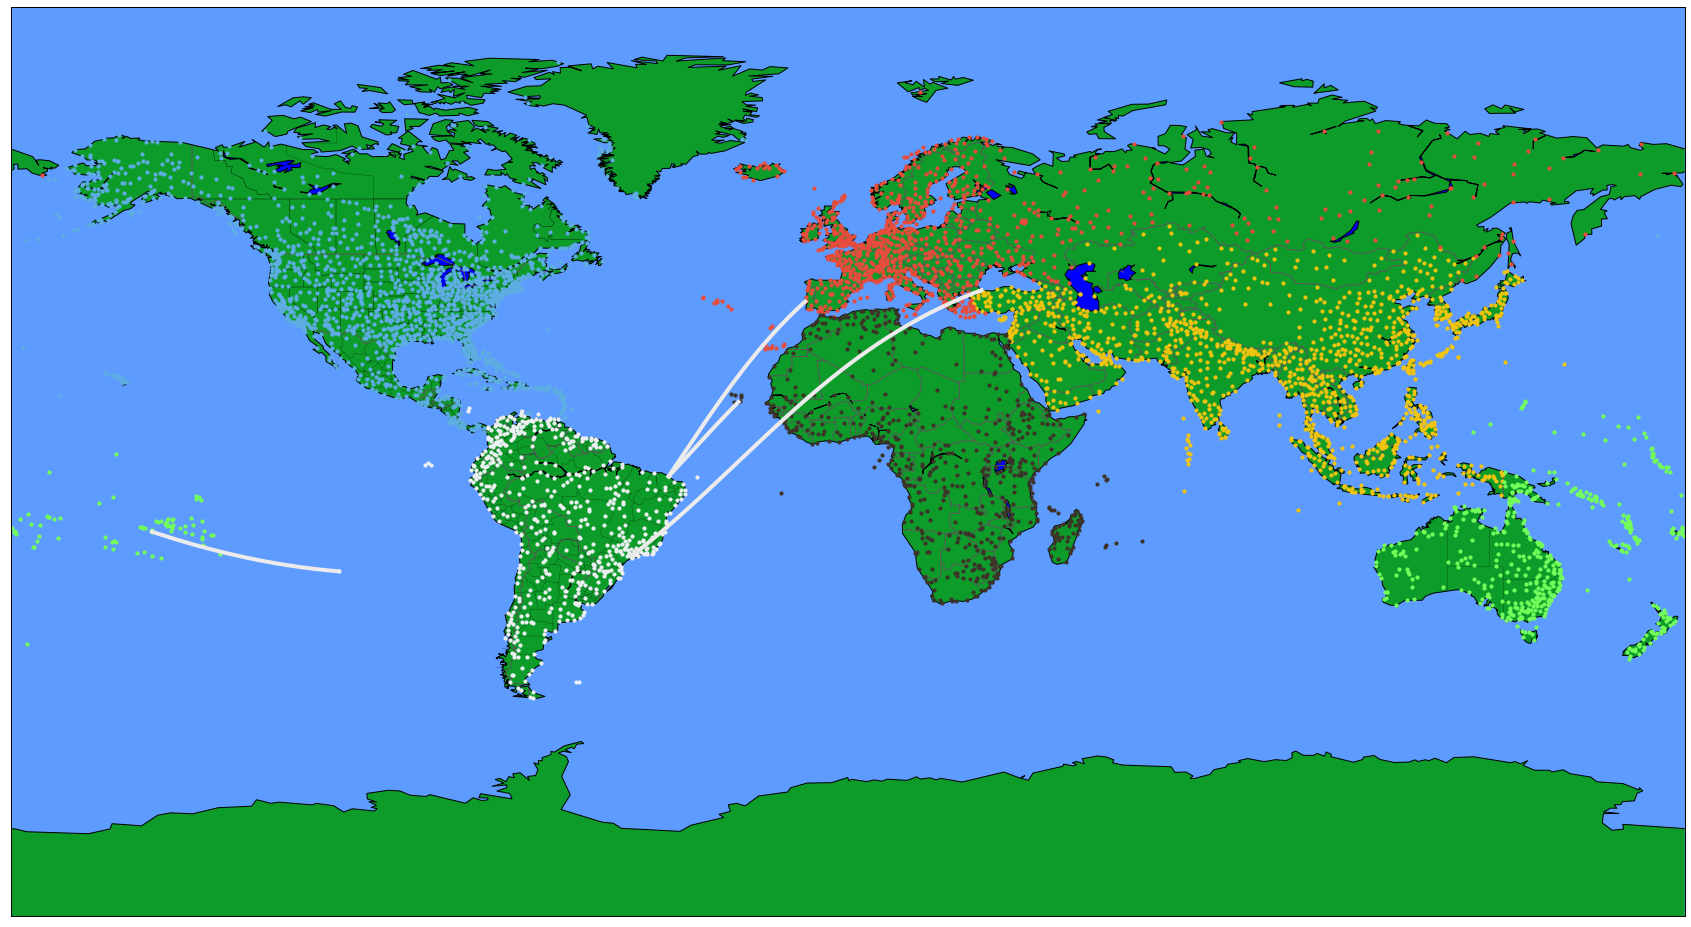

In [10]:
# Plotting the routes on the map
color_set = ["#5DADE2","#F1C40F","#E74C3C","#3D3228","#ECF0F1","#73FF5B"]
plt.figure(figsize = (30,20))
m = Basemap(projection='gall')
m.fillcontinents(color="#0D9C29",lake_color="blue")
m.drawmapboundary(fill_color="#5D9BFF")
m.drawcountries(color='#585858',linewidth = 1)
m.drawstates(linewidth = 0.2)
m.drawcoastlines(linewidth=1)
i = 0
for cont in ["NA","AS","EU","AF","SA","OC"]:
    X, Y = m(list(airport[airport.Final_Continent==cont].Longitude),list(airport[airport.Final_Continent==cont].Latitude))
    m.scatter(X, Y, color=color_set[i],s=10,zorder=2)
    i += 1
for index, row in SA_Routes.iterrows():
    x, y = m.gcpoints(row['Source_Lon'],row['Source_Lat'],row['Dest_Lon'],row['Dest_Lat'],500)
    m.plot(x,y,color="#EBEBEB",linewidth=4)
plt.show()

In [11]:
# Europe
# There is no direct route from Europe to OC?!
EU_Routes = Route_Mileage[(Route_Mileage.Source_Continent=="EU")&(Route_Mileage.Dest_Continent != "EU")]
EU_MIN = EU_Routes.groupby('Dest_Continent')['Distance'].min().reset_index()
EU_Routes = EU_Routes.merge(EU_MIN,how='inner',on=['Dest_Continent','Distance'])
EU_Routes[["Source","Dest","Source_Continent","Dest_Continent","Distance"]]

Source Dest Source_Continent Dest_Continent     Distance
0    KEF  GOH               EU             NA  1405.935942
1    AER  TZX               EU             AS   273.021550
2    LPA  EUN               EU             AF   230.877190
3    LIS  FOR               EU             SA  5597.603200

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  This is separate from the ipykernel package so we can avoid doing imports until
//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  
//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  import sys


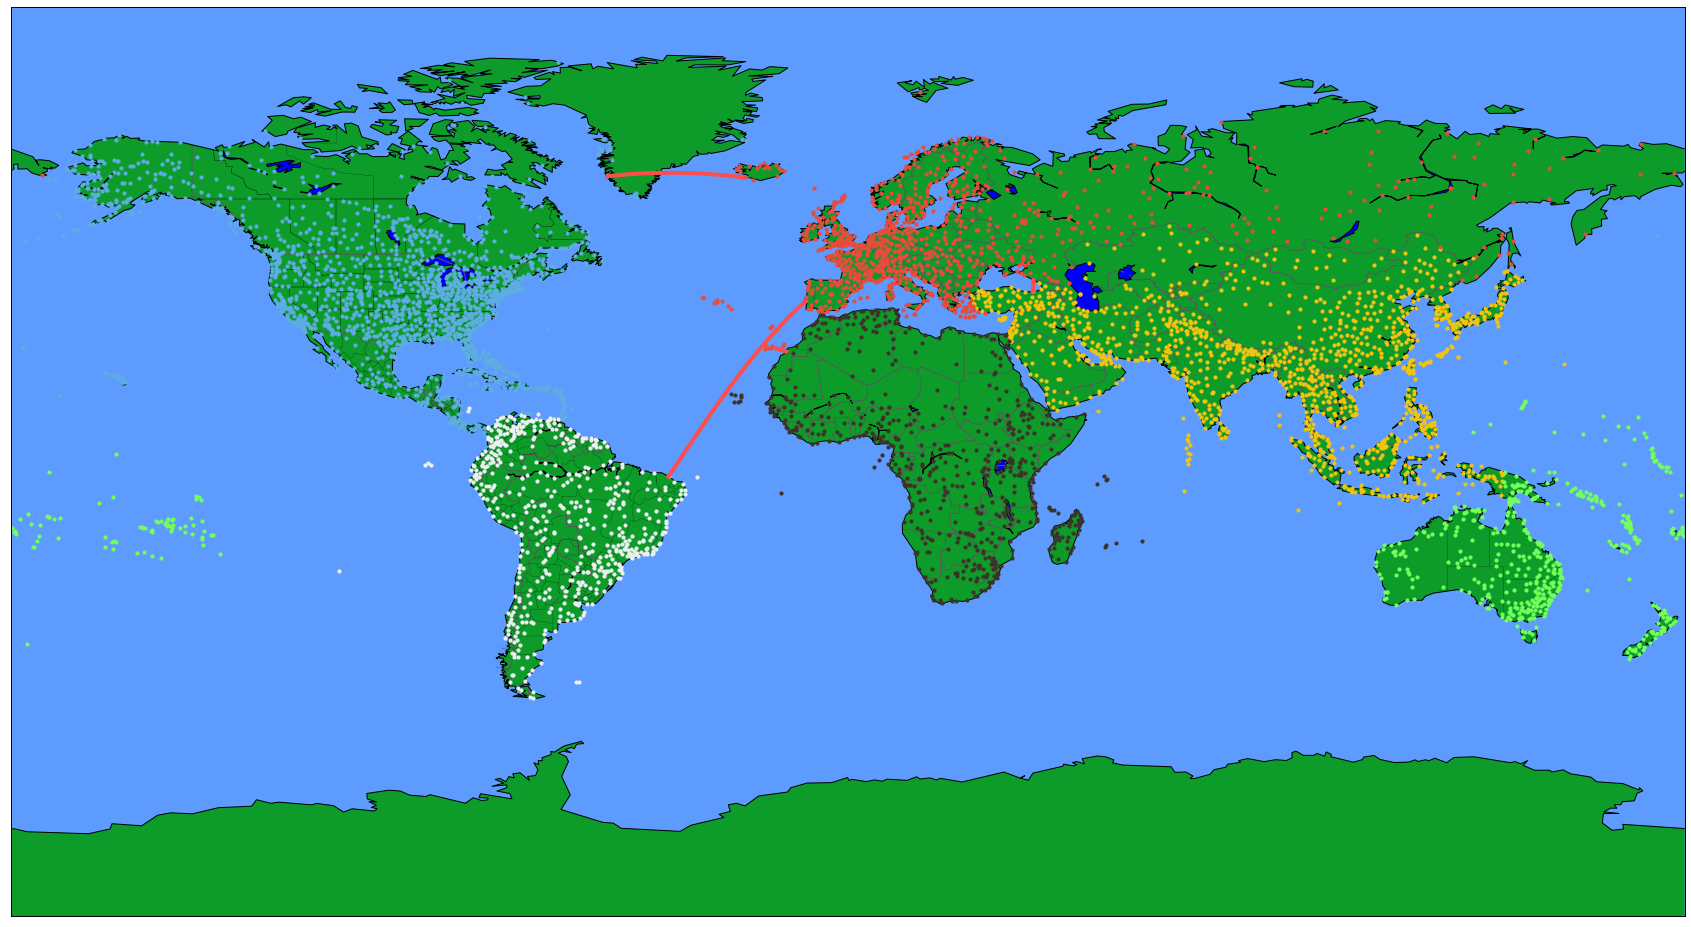

In [12]:
color_set = ["#5DADE2","#F1C40F","#E74C3C","#3D3228","#ECF0F1","#73FF5B"]
plt.figure(figsize = (30,20))
m = Basemap(projection='gall')
m.fillcontinents(color="#0D9C29",lake_color="blue")
m.drawmapboundary(fill_color="#5D9BFF")
m.drawcountries(color='#585858',linewidth = 1)
m.drawstates(linewidth = 0.2)
m.drawcoastlines(linewidth=1)
i = 0
for cont in ["NA","AS","EU","AF","SA","OC"]:
    X, Y = m(list(airport[airport.Final_Continent==cont].Longitude),list(airport[airport.Final_Continent==cont].Latitude))
    m.scatter(X, Y, color=color_set[i],s=10,zorder=2)
    i += 1
for index, row in EU_Routes.iterrows():
    x, y = m.gcpoints(row['Source_Lon'],row['Source_Lat'],row['Dest_Lon'],row['Dest_Lat'],500)
    m.plot(x,y,color="#FF4C4C",linewidth=4)
plt.show()

In [13]:
# Africa
AF_Routes = Route_Mileage[(Route_Mileage.Source_Continent=="AF")&(Route_Mileage.Dest_Continent != "AF")]
AF_MIN = AF_Routes.groupby('Dest_Continent')['Distance'].min().reset_index()
AF_Routes = AF_Routes.merge(AF_MIN,how='inner',on=['Dest_Continent','Distance'])
AF_Routes[["Source","Dest","Source_Continent","Dest_Continent","Distance"]]

Source Dest Source_Continent Dest_Continent     Distance
0    JIB  TAI               AF             AS   259.432615
1    MRU  PER               AF             OC  5894.954283
2    EUN  LPA               AF             EU   230.877190
3    RAI  BOS               AF             NA  5452.608696
4    RAI  FOR               AF             SA  2651.135667

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  This is separate from the ipykernel package so we can avoid doing imports until
//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  
//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  import sys


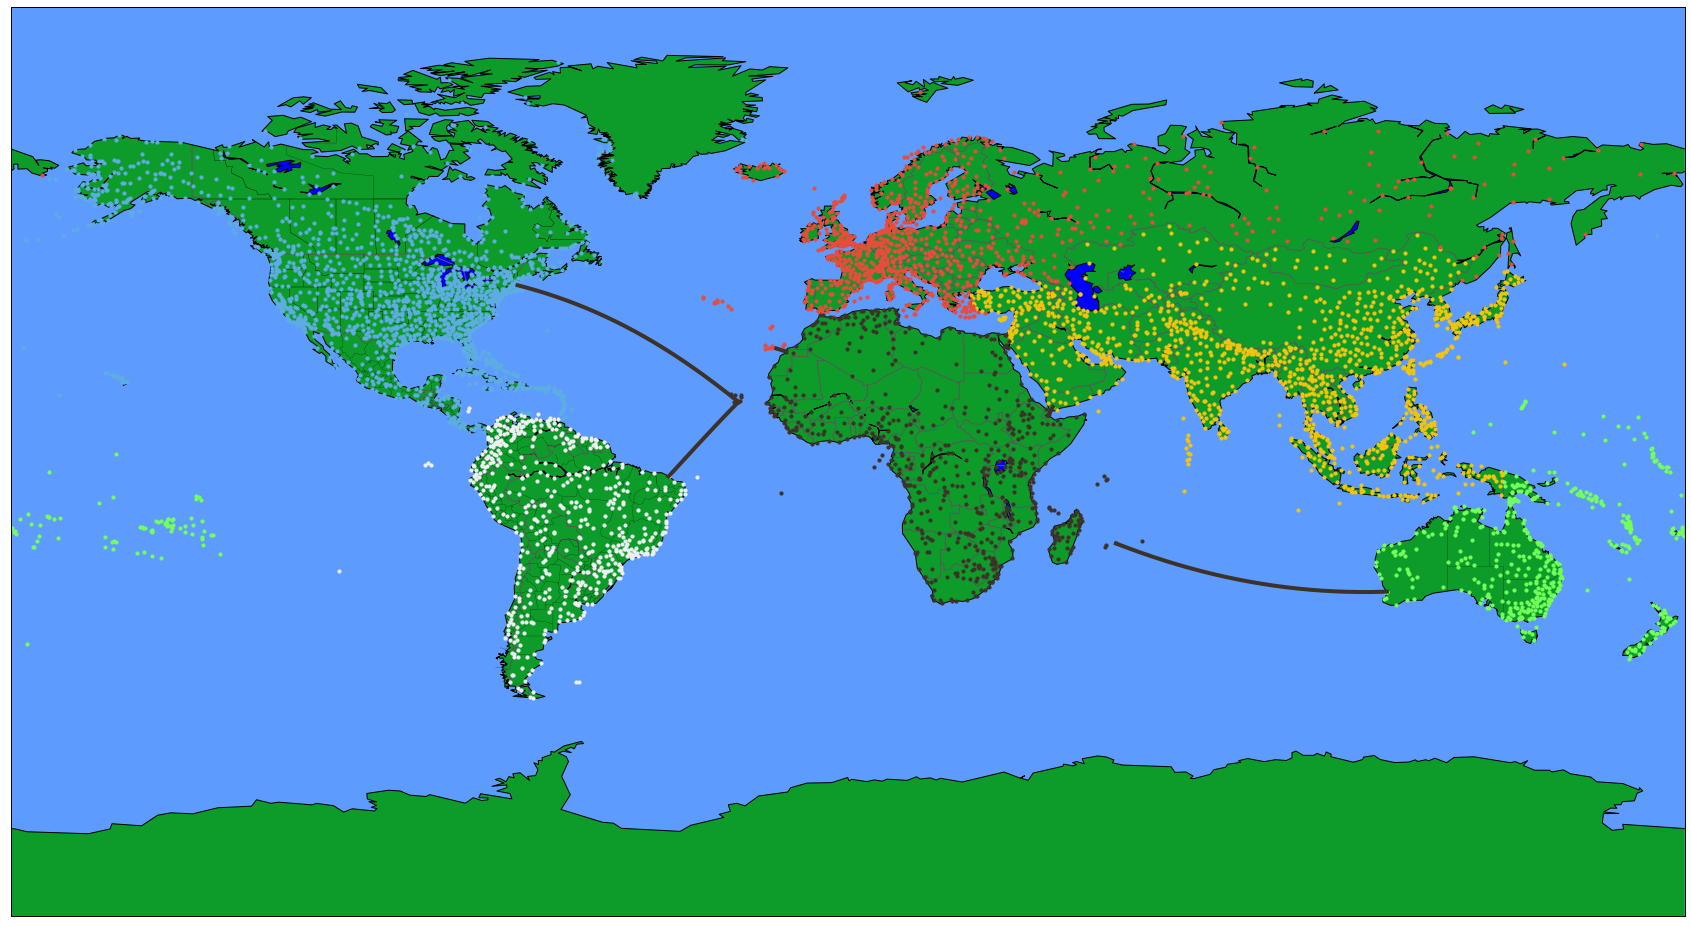

In [14]:
color_set = ["#5DADE2","#F1C40F","#E74C3C","#3D3228","#ECF0F1","#73FF5B"]
plt.figure(figsize = (30,20))
m = Basemap(projection='gall')
m.fillcontinents(color="#0D9C29",lake_color="blue")
m.drawmapboundary(fill_color="#5D9BFF")
m.drawcountries(color='#585858',linewidth = 1)
m.drawstates(linewidth = 0.2)
m.drawcoastlines(linewidth=1)
i = 0
for cont in ["NA","AS","EU","AF","SA","OC"]:
    X, Y = m(list(airport[airport.Final_Continent==cont].Longitude),list(airport[airport.Final_Continent==cont].Latitude))
    m.scatter(X, Y, color=color_set[i],s=10,zorder=2)
    i += 1
for index, row in AF_Routes.iterrows():
    x, y = m.gcpoints(row['Source_Lon'],row['Source_Lat'],row['Dest_Lon'],row['Dest_Lat'],500)
    m.plot(x,y,color="#3D3228",linewidth=4)
plt.show()

In [15]:
# Asia
AS_Routes = Route_Mileage[(Route_Mileage.Source_Continent=="AS")&(Route_Mileage.Dest_Continent != "AS")]
AS_MIN = AS_Routes.groupby('Dest_Continent')['Distance'].min().reset_index()
AS_Routes = AS_Routes.merge(AS_MIN,how='inner',on=['Dest_Continent','Distance'])
AS_Routes[["Source","Dest","Source_Continent","Dest_Continent","Distance"]]

Source Dest Source_Continent Dest_Continent      Distance
0    TAI  JIB               AS             AF    259.432615
1    CTS  HNL               AS             NA   6035.568493
2    TZX  AER               AS             EU    273.021550
3    IST  GRU               AS             SA  10546.273142
4    DIL  DRW               AS             OC    725.318629

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  This is separate from the ipykernel package so we can avoid doing imports until
//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  
//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  import sys


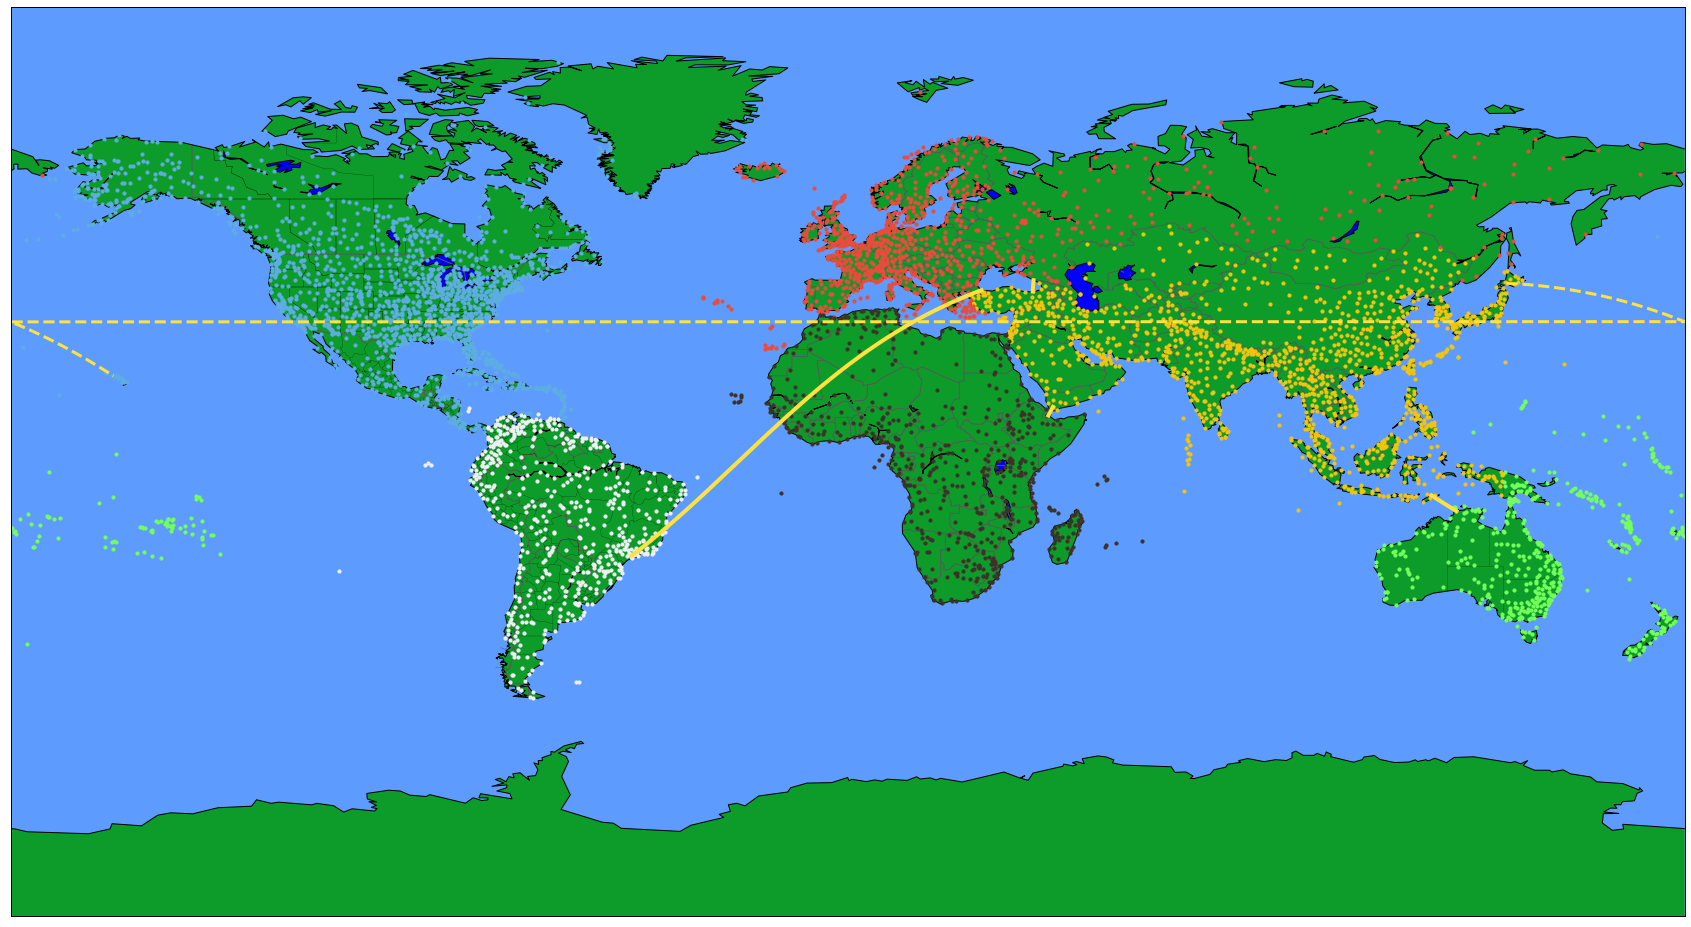

In [16]:
color_set = ["#5DADE2","#F1C40F","#E74C3C","#3D3228","#ECF0F1","#73FF5B"]
plt.figure(figsize = (30,20))
m = Basemap(projection='gall')
m.fillcontinents(color="#0D9C29",lake_color="blue")
m.drawmapboundary(fill_color="#5D9BFF")
m.drawcountries(color='#585858',linewidth = 1)
m.drawstates(linewidth = 0.2)
m.drawcoastlines(linewidth=1)
i = 0
for cont in ["NA","AS","EU","AF","SA","OC"]:
    X, Y = m(list(airport[airport.Final_Continent==cont].Longitude),list(airport[airport.Final_Continent==cont].Latitude))
    m.scatter(X, Y, color=color_set[i],s=10,zorder=2)
    i += 1
for index, row in AS_Routes.iterrows():
    if row['Dest_Continent'] == "NA":
        x, y = m.gcpoints(row['Source_Lon'],row['Source_Lat'],row['Dest_Lon'],row['Dest_Lat'],500)
        m.plot(x,y,color="#FFE23D",linewidth=3,linestyle='dashed')
    else:
        x, y = m.gcpoints(row['Source_Lon'],row['Source_Lat'],row['Dest_Lon'],row['Dest_Lat'],500)
        m.plot(x,y,color="#FFE23D",linewidth=4)
plt.show()

In [17]:
# Oceania
OC_Routes = Route_Mileage[(Route_Mileage.Source_Continent=="OC")&(Route_Mileage.Dest_Continent != "OC")]
OC_MIN = OC_Routes.groupby('Dest_Continent')['Distance'].min().reset_index()
OC_Routes = OC_Routes.merge(OC_MIN,how='inner',on=['Dest_Continent','Distance'])
OC_Routes[["Source","Dest","Source_Continent","Dest_Continent","Distance"]]

Source Dest Source_Continent Dest_Continent     Distance
0    CXI  HNL               OC             NA  2139.862991
1    PPT  IPC               OC             SA  4254.118466
2    PER  MRU               OC             AF  5894.954283
3    DRW  DIL               OC             AS   725.318629

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  This is separate from the ipykernel package so we can avoid doing imports until
//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  
//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  import sys


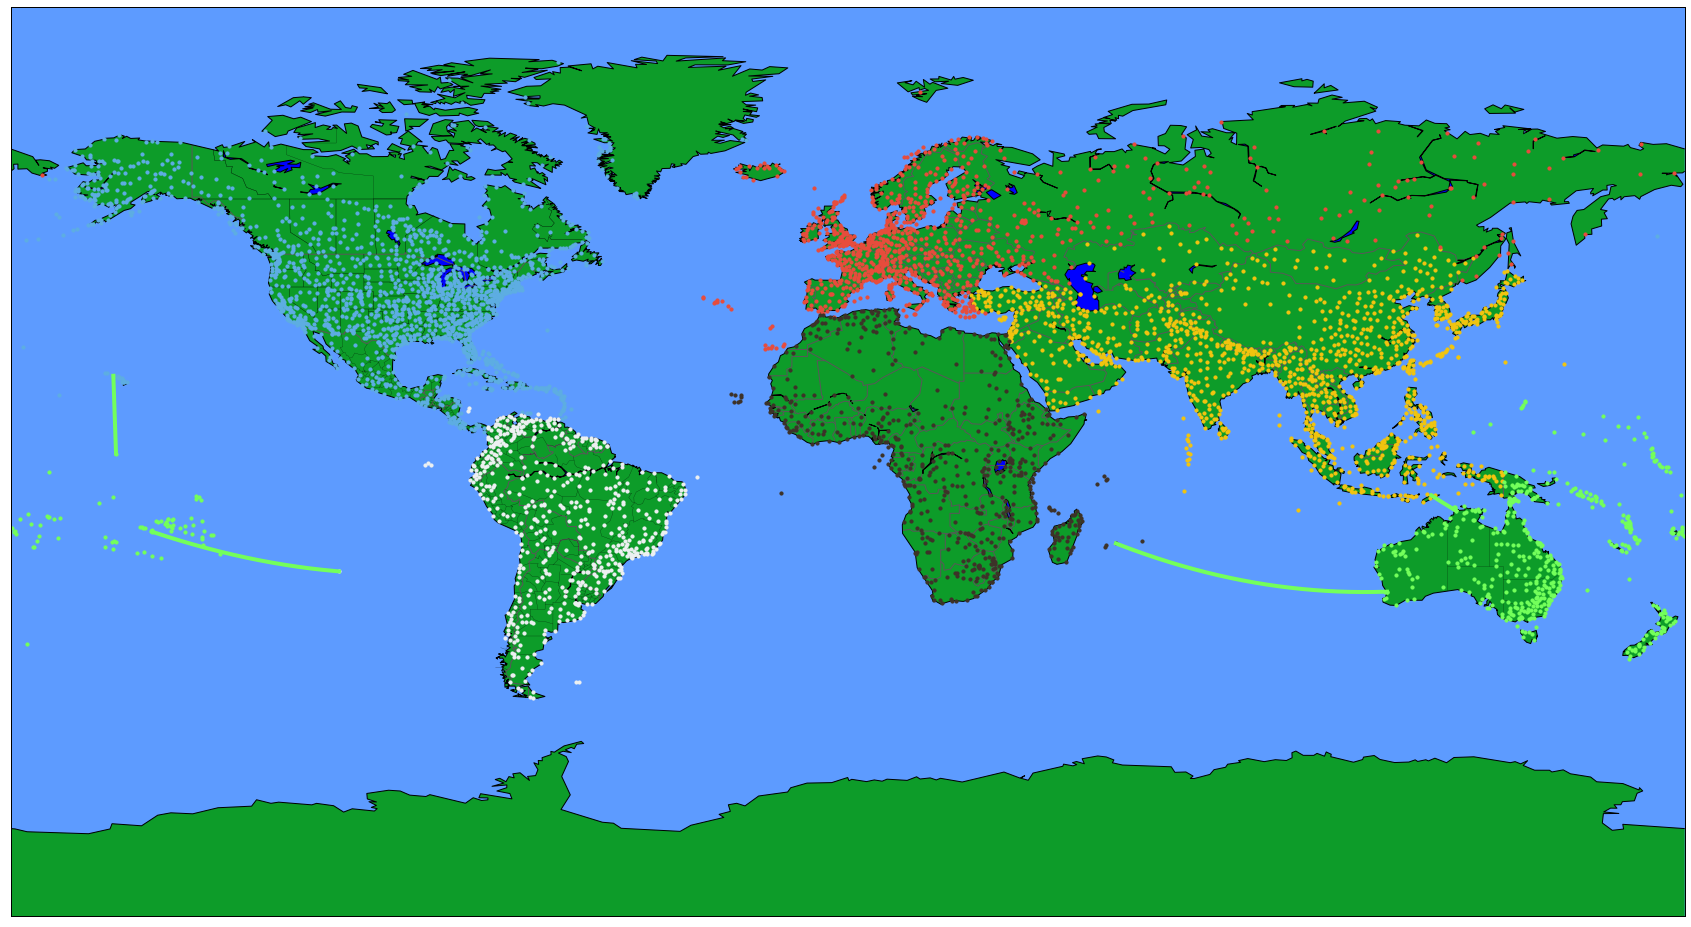

In [18]:
color_set = ["#5DADE2","#F1C40F","#E74C3C","#3D3228","#ECF0F1","#73FF5B"]
plt.figure(figsize = (30,20))
m = Basemap(projection='gall')
m.fillcontinents(color="#0D9C29",lake_color="blue")
m.drawmapboundary(fill_color="#5D9BFF")
m.drawcountries(color='#585858',linewidth = 1)
m.drawstates(linewidth = 0.2)
m.drawcoastlines(linewidth=1)
i = 0
for cont in ["NA","AS","EU","AF","SA","OC"]:
    X, Y = m(list(airport[airport.Final_Continent==cont].Longitude),list(airport[airport.Final_Continent==cont].Latitude))
    m.scatter(X, Y, color=color_set[i],s=10,zorder=2)
    i += 1
for index, row in OC_Routes.iterrows():
    x, y = m.gcpoints(row['Source_Lon'],row['Source_Lat'],row['Dest_Lon'],row['Dest_Lat'],500)
    m.plot(x,y,color="#73FF5B",linewidth=4)
plt.show()

In [19]:
import networkx as nx
import itertools

In [20]:
G = nx.from_pandas_edgelist(Route_Mileage,'Source','Dest',edge_attr='Distance',create_using=nx.DiGraph())

In [21]:
nx.set_node_attributes(G,airport.Latitude.copy().rename(airport.IATA).to_dict(),'Latitude')
nx.set_node_attributes(G,airport.Longitude.copy().rename(airport.IATA).to_dict(),'Longitude')
nx.set_node_attributes(G,airport.Final_Continent.copy().rename(airport.IATA).to_dict(),'Continent')

In [22]:
nx.dijkstra_path(G,source='ATL',target='TPE',weight='Distance')

['ATL', 'ICN', 'TPE']

In [23]:
def Globetrotting(G,Start_Airport,Must_go=[],Dont_go=[]):
    Start = Start_Airport
    sites = []
    Continents = ['NA','SA','EU','AF','AS','OC']
    st_continent = G.nodes[Start]['Continent']
    Continents.remove(st_continent)
    i = 0
    n = len(Must_go)
    while (len(Continents)+len(Must_go) > 0):
        pos_nodes = [x for x,y in G.nodes(data=True) if (y['Continent'] in Continents)]
        pos_nodes = pos_nodes + Must_go
        pos_nodes = [x for x in pos_nodes if x not in Dont_go]
        pos_dest = nx.single_source_dijkstra(G,Start,weight='Distance')[0]
        del pos_dest[Start]
        pos_dest = {key: value for key, value in pos_dest.items() if key in pos_nodes}
        if len(pos_dest) > 0:
            final_dest = min(pos_dest,key=pos_dest.get)
            sites.append(final_dest) # append
            if G.nodes[final_dest]['Continent'] in Continents:
                Continents.remove(G.nodes[final_dest]['Continent'])
            if final_dest in Must_go:
                Must_go.remove(final_dest)
            Start = final_dest
        else:
            print("Sorry, the schedule cannot be finished...")
            break
        i += 1
        if i-n == 50:
            print("Sorry, there are some errors that we cannot find the right solutions")
            break
    sites = [Start_Airport]+sites+[Start_Airport]
    return sites

In [24]:
sites = Globetrotting(G = G,Start_Airport='ATL')

In [25]:
sites_pairs = [(x,y) for x, y in itertools.zip_longest(sites, sites[1:])]
sites_pairs = sites_pairs[:-1]

In [26]:
sites

['ATL', 'BAQ', 'TFN', 'EUN', 'ADB', 'ROR', 'ATL']

In [27]:
Distance = 0
for pair in sites_pairs:
    d = nx.dijkstra_path_length(G,pair[0],pair[1],weight="Distance")
    Distance += d
print("Total Travel Distance: {:,.2f}km".format(Distance))

Total Travel Distance: 39,904.88km


//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  
//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  """
//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  


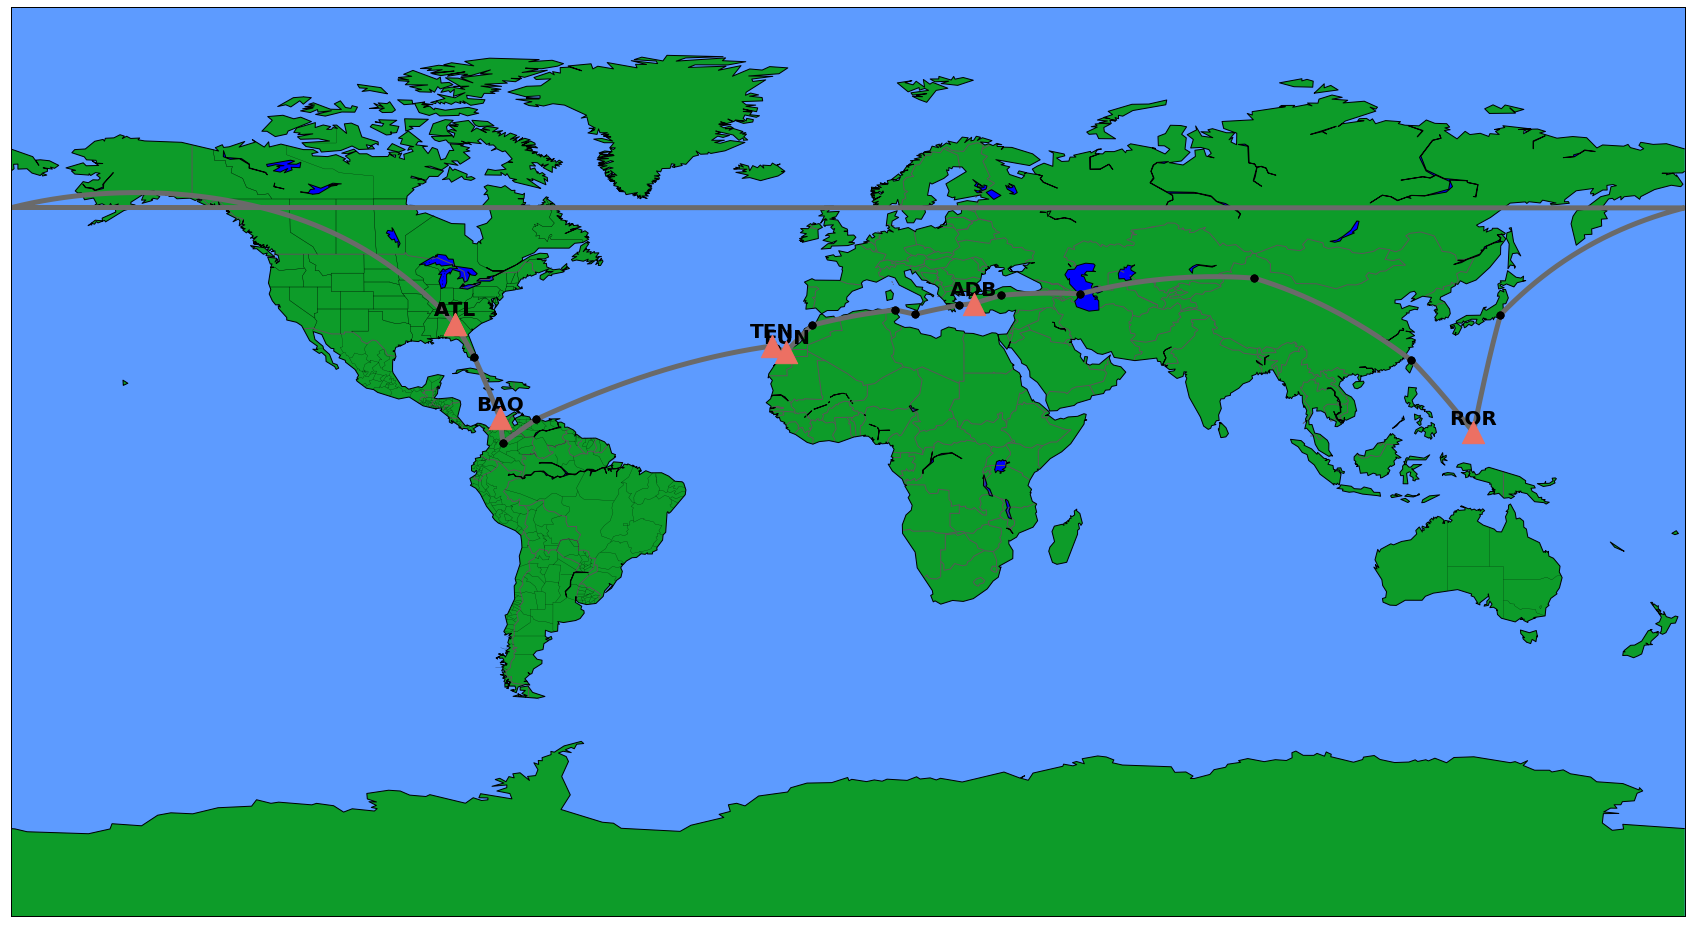

In [28]:
plt.figure(figsize = (30,20))
m = Basemap(projection='gall')
m.fillcontinents(color="#0D9C29",lake_color="blue")
m.drawmapboundary(fill_color="#5D9BFF")
m.drawcountries(color='#585858',linewidth = 1)
m.drawstates(linewidth = 0.2)
m.drawcoastlines(linewidth=1)
for s in sites:
    x0, y0 = m(G.nodes[s]['Longitude'],G.nodes[s]['Latitude'])
    m.scatter(x0, y0, marker='^',color="#EC7063", s=500,zorder=5)
    plt.text(x0,y0+100000,s,fontsize=20,fontweight='bold',ha='center',va='bottom',color="black")
for sites_pair in sites_pairs:
    route = nx.dijkstra_path(G,source=sites_pair[0],target=sites_pair[1],weight='Distance')
    ss = [(x,y) for x, y in itertools.zip_longest(route, route[1:])]
    ss = ss[:-1]
    for d_site in ss:
        x, y = m.gcpoints(G.nodes[d_site[0]]['Longitude'],G.nodes[d_site[0]]['Latitude'],
                          G.nodes[d_site[1]]['Longitude'],G.nodes[d_site[1]]['Latitude'],500)
        m.plot(x, y,color="#6A6A6A",linewidth=5)
        x2, y2 = m([y['Longitude'] for x, y in G.nodes(data=True) if x in d_site],
                   [y['Latitude'] for x, y in G.nodes(data=True) if x in d_site])
        m.scatter(x2, y2,color='#000000',s=50,zorder=4)
plt.show()

In [29]:
sites = Globetrotting(G = G,Start_Airport='ATL',Must_go=['TPE'],Dont_go=['SPN','GUM','HNL','RAI','VVO','IPC','MKK','LNY','JHM',
                                                           'OGG','LIH','HNM','KOA','MUE','ITO','TFN','FNC','LPA','SPC',
                                                           'VDE','TFS','FUE','ACE','PDL'])

In [30]:
sites

['ATL', 'BAQ', 'KEF', 'ORN', 'ADB', 'TPE', 'ROR', 'ATL']

In [31]:
sites_pairs = [(x,y) for x, y in itertools.zip_longest(sites, sites[1:])]
sites_pairs = sites_pairs[:-1]

In [32]:
Distance = 0
for pair in sites_pairs:
    d = nx.dijkstra_path_length(G,pair[0],pair[1],weight="Distance")
    Distance += d
print("Total Travel Distance: {:,.2f}km".format(Distance))

Total Travel Distance: 41,829.62km


//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  
//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  """
//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  


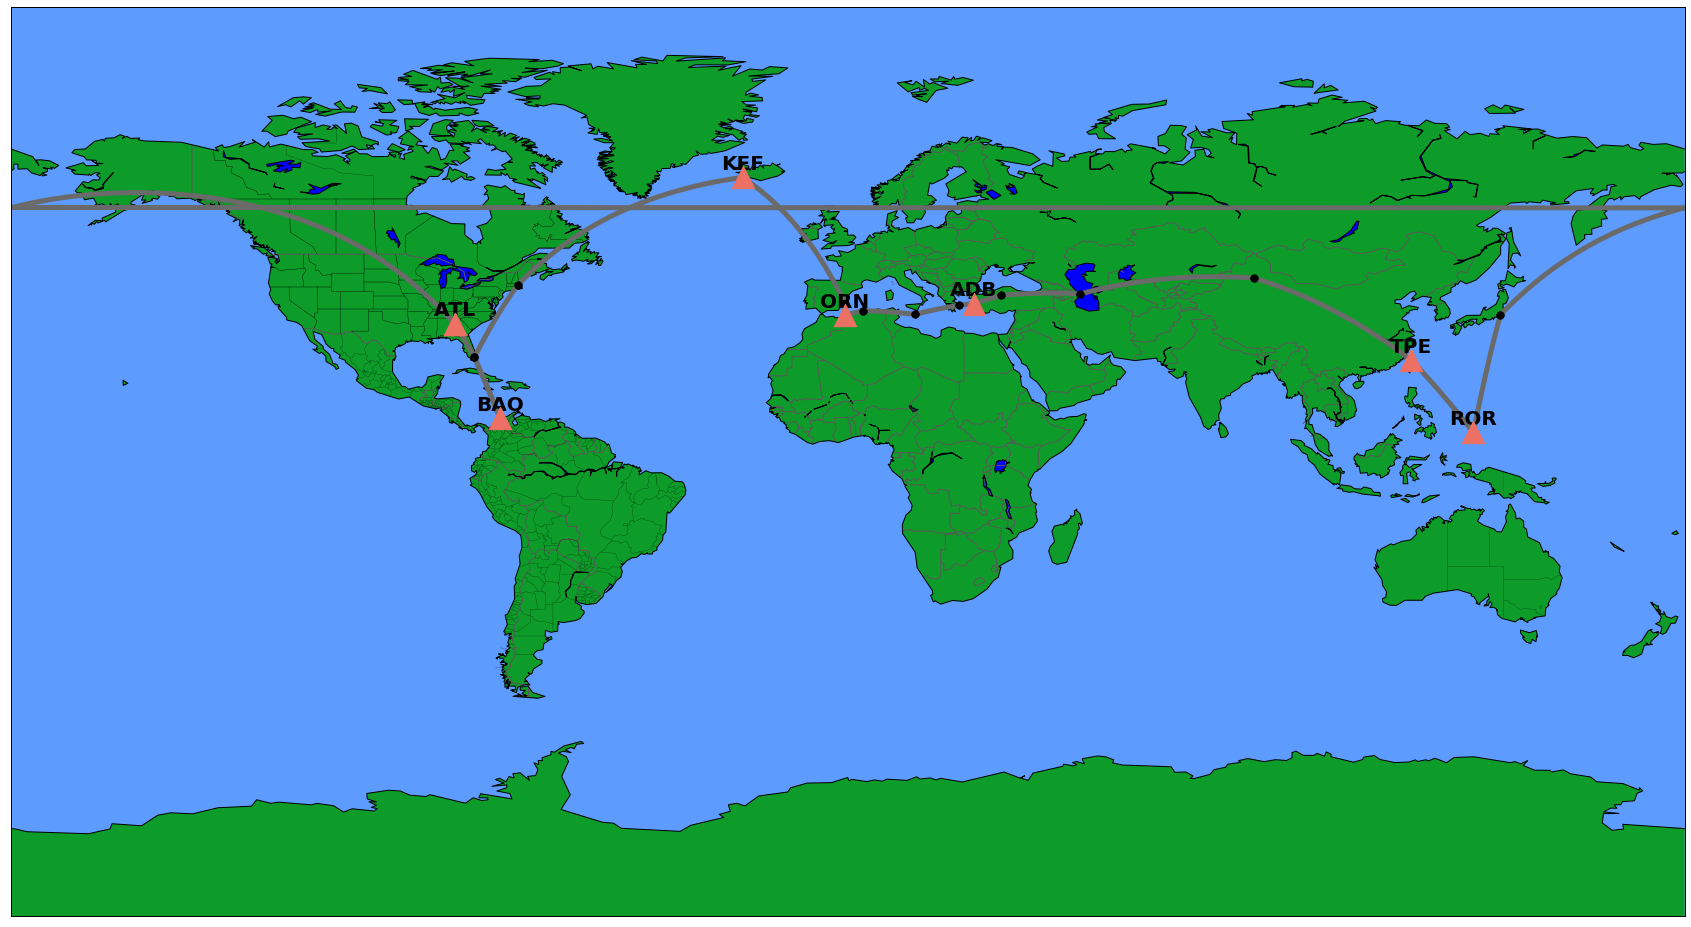

In [33]:
plt.figure(figsize = (30,20))
m = Basemap(projection='gall')
m.fillcontinents(color="#0D9C29",lake_color="blue")
m.drawmapboundary(fill_color="#5D9BFF")
m.drawcountries(color='#585858',linewidth = 1)
m.drawstates(linewidth = 0.2)
m.drawcoastlines(linewidth=1)
for s in sites:
    x0, y0 = m(G.nodes[s]['Longitude'],G.nodes[s]['Latitude'])
    m.scatter(x0, y0, marker='^',color="#EC7063", s=500,zorder=5)
    plt.text(x0,y0+100000,s,fontsize=20,fontweight='bold',ha='center',va='bottom',color="black")
for sites_pair in sites_pairs:
    route = nx.dijkstra_path(G,source=sites_pair[0],target=sites_pair[1],weight='Distance')
    ss = [(x,y) for x, y in itertools.zip_longest(route, route[1:])]
    ss = ss[:-1]
    for d_site in ss:
        x, y = m.gcpoints(G.nodes[d_site[0]]['Longitude'],G.nodes[d_site[0]]['Latitude'],
                          G.nodes[d_site[1]]['Longitude'],G.nodes[d_site[1]]['Latitude'],500)
        m.plot(x, y,color="#6A6A6A",linewidth=5)
        x2, y2 = m([y['Longitude'] for x, y in G.nodes(data=True) if x in d_site],
                   [y['Latitude'] for x, y in G.nodes(data=True) if x in d_site])
        m.scatter(x2, y2,color='#000000',s=50,zorder=4)
plt.show()